# Child Well-being Risk Index


This index is to assess the risk to the well-being status of children around the world. 

The index covers the following list of countries: 'AFG', 'DZA', 'ARM', 'AZE', 'BGD', 'BEN', 'BRA', 'BFA', 'BDI',
       'KHM', 'CMR', 'TCD', 'CHL', 'COL', 'COD', 'COG', 'CRI', 'CIV',
       'DOM', 'ECU', 'EGY', 'SLV', 'ETH', 'GAB', 'GEO', 'GTM', 'HND',
       'IDN', 'JOR', 'KAZ', 'KGZ', 'MDG', 'MLI', 'MRT', 'MEX', 'MDA',
       'MNG', 'NIC', 'NER', 'MKD', 'PAK', 'PAN', 'PRY', 'PER', 'ROU',
       'SEN', 'SRB', 'LKA', 'THA', 'TGO', 'TTO', 'TUN', 'TUR', 'UGA',
       'UKR', 'URY', 'VNM', 'YEM'
       
       
       
      

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from CWBR_index import make_index
from plots import pca_plot
from ggdata.conversions import ISO_to_Everything

## Data

In [2]:
df = (
    pd.read_csv('data/data.csv')
      .set_index(['ISO', 'Year'])
      .drop(columns=['Country'])
      .dropna()
)

df.head(5)

education_learning_poverty  education_school_out  \
ISO Year                                                     
AFG 1962                   93.447998             49.599998   
    1963                   93.447998             49.599998   
    1964                   93.447998             49.599998   
    1965                   93.447998             49.599998   
    1966                   93.447998             49.599998   

          health_immunization  health_mortality  labor_employment_total  \
ISO Year                                                                  
AFG 1962                 96.0             34.46                     9.3   
    1963                 96.0             33.87                     9.3   
    1964                 96.0             33.31                     9.3   
    1965                 96.0             32.76                     9.3   
    1966                 96.0             32.20                     9.3   

          labor_hour_total  nourishment_stunting  nourishment_underweight  
ISO Year                                                                   
AFG 1962              13.1                  53.2                     44.9  
    1963              13.1                  53.2                     44.9  
    1964              13.1                  53.2                     44.9  
    1965              13.1                  53.2                     44.9  
    1966              13.1                  53.2                     44.9

## The Index

We perform Principal Components Analysis (PCA) on 8 indicators and adopt the first principal component as our index. 

The lower the index, the lower the risk to children's well-being in a country.

In [3]:
pipe, PC_df, X_proj, Variance_df = make_index(df)

PC_df demonstrates the weights of PC_1 and PC_2 for each indicator. The weights varies between 0.14 and 0.41 and are mostly evenly distributed. Nourishment stuning is the most important aspect while labor is less impactful.

In [4]:
PC_df

,PC_1,PC_2
education_learning_poverty,0.357622,0.235816
education_school_out,0.317457,0.064030
health_immunization,0.380752,-0.038646
health_mortality,0.416582,-0.068080
labor_employment_total,0.307109,-0.424366
labor_hour_total,0.140043,0.861169
nourishment_stunting,0.413912,-0.016024
nourishment_underweight,0.409346,-0.110483


The PCA plot below shows the correlation between indicators as well as the amount of variance captured. The first dimension explains 52 % of the total dataset variance. Additionnaly, most indicators align with the first dimension. 

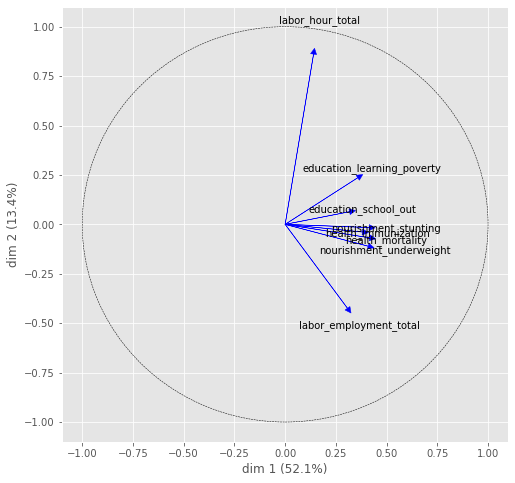

In [5]:
pca_plot(pipe['pca'], labels=df.columns, figsize=(8, 8))

## Relationship among Variables

PC_1 relates to income, as shown on the left graph.

The right graph, as shown on previous, have some variables cluster together.

<AxesSubplot:xlabel='PC_1', ylabel='PC_2'>

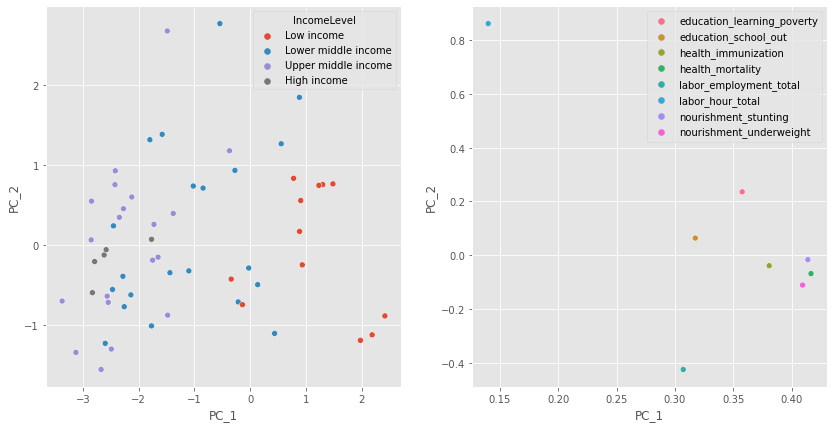

In [6]:
X_adj = X_proj.reset_index().merge(ISO_to_Everything(X_proj.reset_index()['ISO']).drop_duplicates().reset_index(), on = 'ISO')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(data=X_adj.query('Year == 2017'), x='PC_1', y='PC_2', hue='IncomeLevel', ax=ax1)
sns.scatterplot(data=PC_df.reset_index(), x='PC_1', y='PC_2', hue=PC_df.index, ax=ax2)

## Trend

The following graphs show the change in index by income level and countrywise on left and right plots below, respectively.

The index is decreasing for all income levels and countries, which means the risk to children's well-being is being lowered.

<AxesSubplot:xlabel='Year', ylabel='PC_1'>

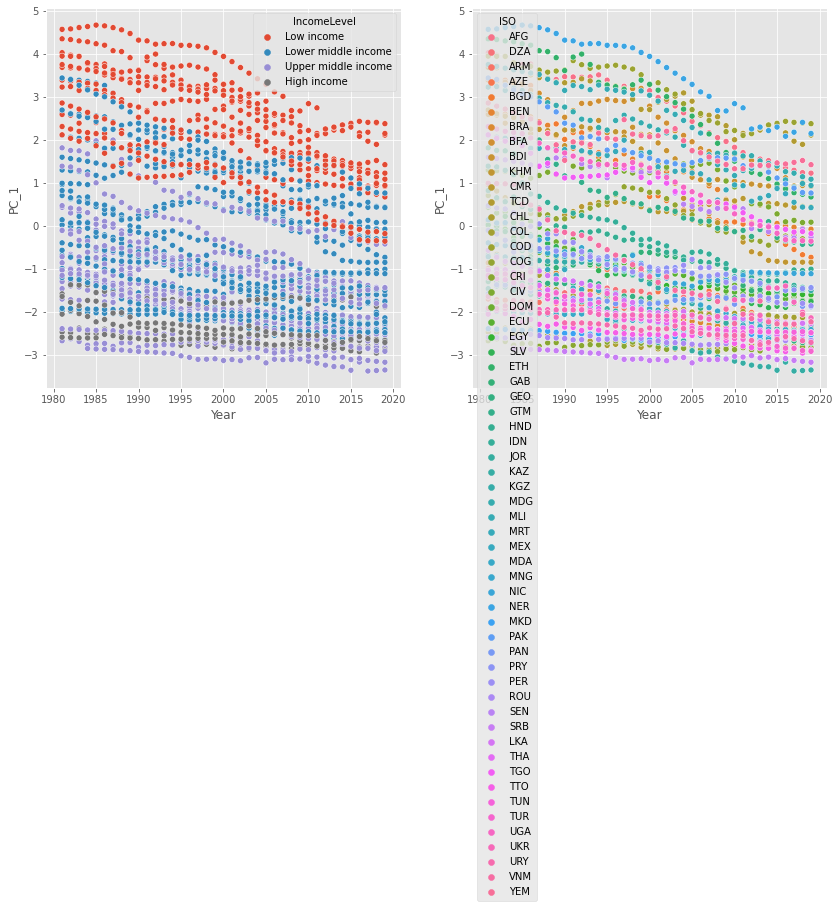

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(data=X_adj.query('Year >1980'), x='Year', y='PC_1', hue='IncomeLevel', ax=ax1)
sns.scatterplot(data=X_adj.query('Year >1980'), x='Year', y='PC_1', hue='ISO', ax=ax2)

In [9]:
plot_df = X_proj.reset_index()
px.scatter(plot_df, 
          x = 'Year',
          y = 'PC_1',
          color = 'ISO').add_traces(fig_line.data)